try to find a set of '3D sensative' molecules, for example, based on how many conformers are generated when doing conformer generation with pruning

In [2]:
from rdkit import Chem
import gzip
from rdkit.Chem import rdDistGeom
import pickle
import rdkit
import os
print(f'RDKit version: {rdkit.__version__}')


import time
numConfs=100
def generate_confs(smiles):
    etkdg = rdDistGeom.ETKDGv3()
    etkdg.randomSeed = 0xa700f
    etkdg.verbose = False
    etkdg.numThreads = 4
    etkdg.trackFailures = True
    etkdg.useRandomCoords = True
    etkdg.pruneRmsThresh = 0.1
    confs_generated = []

    for smi in smiles:
        m = Chem.MolFromSmiles(smi)
        if m is None:
            print(f'Failed to create mol from SMILES: {smi}')
            continue
        m = Chem.AddHs(m)
        try:
            rdDistGeom.EmbedMultipleConfs(m,numConfs = numConfs, params = etkdg)
        except:
            print(f'Failed to generate conformers for SMILES: {smi}')
            continue
        confs_generated.append(m.GetNumConformers())
    return confs_generated

RDKit version: 2023.03.3


In [6]:
import pandas as pd
df = pd.read_csv('OPERA_Naef_Training.csv')
molblocks = df['molblock'].tolist()
mols = [Chem.MolFromMolBlock(mb) for mb in molblocks]
smiles = [Chem.MolToSmiles(m) for m in mols]

start = time.time()
confs_generated = generate_confs(smiles)
end = time.time()
print(confs_generated)


[21:10:37] Warning: molecule is tagged as 3D, but all Z coords are zero
[21:10:37] Warning: molecule is tagged as 3D, but all Z coords are zero
[21:10:37] Warning: molecule is tagged as 3D, but all Z coords are zero


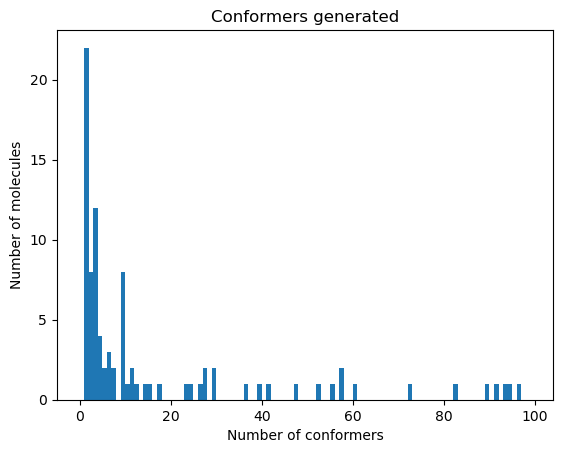

In [5]:
#histogram
import matplotlib.pyplot as plt
plt.hist(confs_generated, bins=range(0, 100, 1))
plt.title('Conformers generated')
plt.xlabel('Number of conformers')
plt.ylabel('Number of molecules')
plt.show()